# A collection of different sorting algorithms

## Important imports and helper functions

In [29]:
import math
import time
import random
import matplotlib.pyplot as plt
import numpy as np
from typing import List

# Helper function to generate random lists
def generate_random_list(size, min_val=1, max_val=100):
    """Generate a random list of integers."""
    return [random.randint(min_val, max_val) for _ in range(size)]

# Helper function to check if a list is sorted
def is_sorted(lst):
    """Check if a list is sorted in ascending order."""
    return all(lst[i] <= lst[i+1] for i in range(len(lst)-1))

# Helper function to time a sorting function
def time_sort(sort_func, lst):
    """Time how long a sorting function takes."""
    lst_copy = lst.copy()
    start = time.time()
    sort_func(lst_copy)
    end = time.time()
    return end - start

## Bubble sort

In [32]:
def bubble_sort(lst):
    """
    Bubble sort that counts the number of comparisons made.

    Args:
        lst: A list of comparable elements
    """
    n = len(lst)
    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if lst[j] > lst[j+1]:
                lst[j], lst[j+1] = lst[j+1], lst[j]
                swapped = True
        if not swapped:
            break

In [33]:
def bubble_sort_with_count(lst):
    """
    Bubble sort that counts the number of comparisons made.

    Args:
        lst: A list of comparable elements

    Returns:
        tuple: (sorted_list, comparison_count)
    """
    lst = lst.copy()  # Don't modify the original list
    n = len(lst)
    comparison_count = 0

    for i in range(n):
        swapped = False
        for j in range(0, n-i-1):
            if lst[j] > lst[j+1]:
                lst[j], lst[j+1] = lst[j+1], lst[j]
                swapped = True
                comparison_count += 1
        if not swapped:
            break
    
    return lst, comparison_count

In [34]:
# Testing implementation
test_sizes = [5, 10, 20, 30]
for size in test_sizes:
    test_list = generate_random_list(size)
    sorted_list, count = bubble_sort_with_count(test_list)
    print(f"List size: {size}, Comparisons: {count}")
    assert is_sorted(sorted_list), f"List not sorted correctly!"

# Analyze worst case
worst_case = list(range(10, 0, -1))  # [10, 9, 8, ..., 1]
_, worst_count = bubble_sort_with_count(worst_case)
print(f"\nWorst case for size 10: {worst_count} comparisons")
print(f"Expected (n*(n-1)/2): {10*9//2} comparisons")

List size: 5, Comparisons: 4
List size: 10, Comparisons: 25
List size: 20, Comparisons: 106
List size: 30, Comparisons: 237

Worst case for size 10: 45 comparisons
Expected (n*(n-1)/2): 45 comparisons


## Selection Sort

In [35]:
def selection_sort(lst):
    """
    Implement selection sort algorithm.

    Args:
        lst: A list of comparable elements

    Returns:
        None (sorts the list in-place)
    """
    n = len(lst)

    for i in range(n):
      min_idx = i
      for j in range(i+1, n):
        if lst[j] < lst[min_idx]:
          min_idx = j
      #Swap minimum
      lst[i],lst[min_idx] = lst[min_idx],lst[i]

In [36]:
# Testing implementation
test_list = [64, 25, 12, 22, 11]
print(f"Original list: {test_list}")
selection_sort(test_list)
print(f"Sorted list: {test_list}")
print(f"Is sorted correctly? {is_sorted(test_list)}")

# Additional test cases
test_cases = [
    [],
    [1],
    [3, 1, 4, 1, 5, 9, 2, 6],
    [5, 4, 3, 2, 1],
    [1, 1, 1, 1]
]

for test in test_cases:
    test_copy = test.copy()
    selection_sort(test_copy)
    assert is_sorted(test_copy), f"Failed on {test}"
print("All test cases passed")

Original list: [64, 25, 12, 22, 11]
Sorted list: [11, 12, 22, 25, 64]
Is sorted correctly? True
All test cases passed


## Insertion Sort

In [37]:
def insertion_sort(lst):
    """
    Implement insertion sort algorithm.

    Args:
        lst: A list of comparable elements

    Returns:
        None (sorts the list in-place)
    """
    n = len(lst)

    i = 0
    while i < n:
      j = i
      while j > 0 and lst[j - 1] > lst[j] : #check if the left element is smaller
        lst[j-1], lst[j] = lst[j], lst[j-1] #Swap
        j -= 1 #move to left of list
      i += 1 #increment to check next element

In [38]:
# Testing implementation
test_list = [12, 11, 13, 5, 6]
print(f"Original list: {test_list}")
insertion_sort(test_list)
print(f"Sorted list: {test_list}")
print(f"Is sorted correctly? {is_sorted(test_list)}")

# Test with different scenarios
test_cases = [
    [3, 1, 4, 1, 5, 9, 2, 6, 5, 3, 5],
    [10, 9, 8, 7, 6, 5, 4, 3, 2, 1],
    [1, 2, 3, 4, 5],
    [5, 2, 4, 6, 1, 3]
]

for test in test_cases:
    test_copy = test.copy()
    insertion_sort(test_copy)
    assert is_sorted(test_copy), f"Failed on {test}"
print("All test cases passed")

Original list: [12, 11, 13, 5, 6]
Sorted list: [5, 6, 11, 12, 13]
Is sorted correctly? True
All test cases passed


## Quciksort

In [39]:
def partition(lst: list, low: int, high: int,
                       sort_by) -> int:
    """
    Partition function for QuickSort

    Args:
        lst: List of objects
        low: Starting index
        high: Ending index
        sort_by: Attribute to sort by

    Returns:
        Partition index
    """
    # Choose the last element as pivot
    pivot_value = getattr(lst[high], sort_by)

    i = low - 1  # Index of smaller element

    for j in range(low, high):
        current_value = getattr(lst[j], sort_by)

        # If current element is smaller than or equal to pivot
        if current_value <= pivot_value:
            i += 1
            lst[i], lst[j] = lst[j], lst[i]

    # Place pivot in correct position
    lst[i + 1], lst[high] = lst[high], lst[i + 1]
    return i + 1

def quicksort(lst: list, low: int, high: int,
                       sort_by, comparisons: List[int] = None) -> None:
    """
    QuickSort implementation

    Args:
        lst: List of  objects
        low: Starting index
        high: Ending index
        sort_by: Attribute to sort by
        comparisons: List to track number of comparisons (for analysis)
    """
    if comparisons is None:
        comparisons = [0]

    if low < high:
        # Count this as a comparison operation
        comparisons[0] += (high - low)

        # Partition the array and get pivot index
        piv = partition(lst, low, high, sort_by)

        # Recursively sort elements before and after partition
        quicksort(lst, low, piv - 1, sort_by, comparisons)
        quicksort(lst, piv + 1, high, sort_by, comparisons)

## Performance Analysis of Bubble Sort, Selection Sort, and Insertion Sort

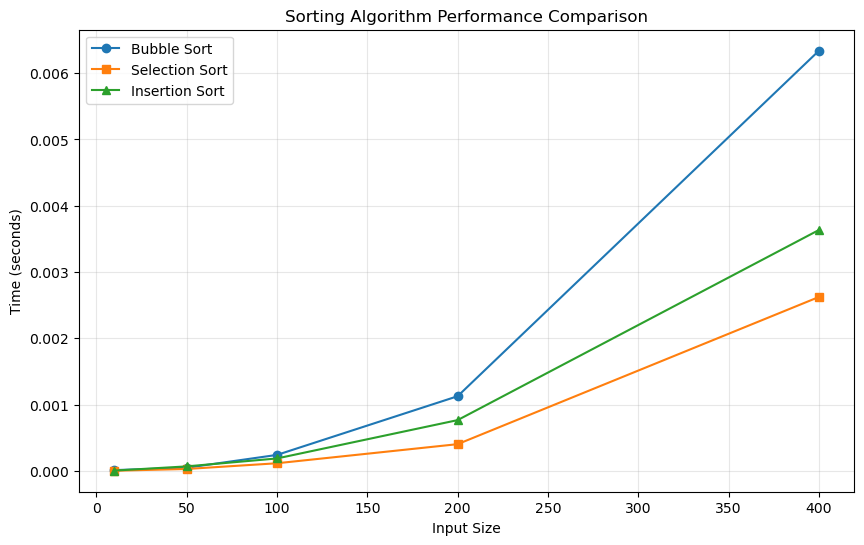

In [40]:
def compare_sorting_algorithms(sizes=[10, 50, 100, 200, 400]):
    """
    Compare the performance of bubble sort, selection sort, and insertion sort.

    Args:
        sizes: List of input sizes to test

    Returns:
        dict: Timing results for each algorithm
    """
    results = {
        'bubble': [],
        'selection': [],
        'insertion': []
    }

    for size in sizes:
        # Generate a random list for testing
        test_list = generate_random_list(size)

        results['bubble'].append(time_sort(bubble_sort, test_list))
        results['selection'].append(time_sort(selection_sort, test_list))
        results['insertion'].append(time_sort(insertion_sort, test_list))

    return results, sizes

# Run the comparison
results, sizes = compare_sorting_algorithms()

# Visualize the results
if results['bubble']:  # Check if results were collected
    plt.figure(figsize=(10, 6))
    plt.plot(sizes, results['bubble'], 'o-', label='Bubble Sort')
    plt.plot(sizes, results['selection'], 's-', label='Selection Sort')
    plt.plot(sizes, results['insertion'], '^-', label='Insertion Sort')
    plt.xlabel('Input Size')
    plt.ylabel('Time (seconds)')
    plt.title('Sorting Algorithm Performance Comparison')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

## QuickSort Implementation and Performance Analysis using Mass Spectrometry Data

In [41]:
class MassSpecPeak:
    """Represents a peak in mass spectrometry data"""

    def __init__(self, mz: float, intensity: float, compound_id: str = None):
        self.mz = mz  # mass-to-charge ratio
        self.intensity = intensity
        self.compound_id = compound_id or f"Unknown_{mz:.2f}"

    def __str__(self):
        return f"Peak(m/z={self.mz:.2f}, intensity={self.intensity:.1f}, {self.compound_id})"

    def __repr__(self):
        return self.__str__()


def generate_mass_spec_data(n_peaks: int) -> List[MassSpecPeak]:
    """Generate realistic mass spectrometry data for testing"""
    import random

    # Common protein/peptide mass ranges and intensities
    peaks = []

    # Define some known compounds with realistic m/z values
    known_compounds = [
        (118.0865, "Valine", "amino acid"),
        (132.1021, "Leucine", "amino acid"),
        (147.0684, "Lysine", "amino acid"),
        (165.0790, "Phenylalanine", "amino acid"),
        (204.0899, "Tryptophan", "amino acid"),
        (524.2649, "Caffeine dimer", "metabolite"),
        (616.1770, "Heme", "cofactor"),
        (1084.42, "Insulin B chain", "peptide"),
        (1420.64, "Insulin A chain", "peptide"),
        (2531.24, "Insulin", "protein"),
    ]

    for mz, name, category in known_compounds[:min(len(known_compounds), n_peaks//3)]:
        intensity = random.uniform(1000, 50000)  # Realistic intensity range
        peaks.append(MassSpecPeak(mz, intensity, f"{name} ({category})"))

    # Add random peaks (noise, unknowns)
    remaining = n_peaks - len(peaks)
    for i in range(remaining):
        mz = random.uniform(100, 3000)  # Typical range
        intensity = random.uniform(100, 10000)  # Lower intensity for unknowns
        peaks.append(MassSpecPeak(mz, intensity, f"Unknown_{i+1}"))

    return peaks

def compare_sorting_performance():
    """Compare QuickSort performance on different data sizes"""
    print("=== Mass Spectrometry Data Sorting Performance ===")
    print("Comparing QuickSort performance on different dataset sizes:\n")

    sizes = [100, 1000, 5000, 10000]

    for size in sizes:
        peaks = generate_mass_spec_data(size)

        import time
        comparisons = [0]

        start_time = time.time()
        quicksort(peaks, 0, len(peaks) - 1, "mz", comparisons)
        end_time = time.time()

        duration = (end_time - start_time) * 1000  # Convert to milliseconds

        print(f"Dataset size: {size:5d} peaks")
        print(f"  Runtime: {duration:8.2f} ms")
        print(f"  Comparisons: {comparisons[0]:8d}")
        print(f"  Theoretical O(n log n): {size * math.log2(size):8.0f}")
        print(f"  Efficiency: {(size * math.log2(size)) / comparisons[0]:.2f}")
        print()

def demonstrate_multi_criteria_sorting():
    print("=== Multi-Criteria Sorting Demo ===")

    peaks = [
        MassSpecPeak(165.08, 25000, "Phenylalanine"),
        MassSpecPeak(118.09, 45000, "Valine"),
        MassSpecPeak(204.09, 15000, "Tryptophan"),
        MassSpecPeak(132.10, 35000, "Leucine"),
        MassSpecPeak(147.07, 20000, "Lysine")
    ]

    print("Original data:")
    for i, peak in enumerate(peaks):
        print(f"  {i+1}. {peak}")

    # Sort by m/z ratio
    peaks_by_mz = peaks.copy()
    quicksort(peaks_by_mz, 0, len(peaks_by_mz) - 1, "mz")

    print("\nSorted by m/z ratio (mass-to-charge):")
    for i, peak in enumerate(peaks_by_mz):
        print(f"  {i+1}. {peak}")

    # Sort by intensity
    peaks_by_intensity = peaks.copy()
    quicksort(peaks_by_intensity, 0, len(peaks_by_intensity) - 1, "intensity")

    print("\nSorted by intensity (signal strength):")
    for i, peak in enumerate(peaks_by_intensity):
        print(f"  {i+1}. {peak}")

In [42]:
compare_sorting_performance()
print("\n" + "="*60 + "\n")
demonstrate_multi_criteria_sorting()

=== Mass Spectrometry Data Sorting Performance ===
Comparing QuickSort performance on different dataset sizes:

Dataset size:   100 peaks
  Runtime:     0.57 ms
  Comparisons:      629
  Theoretical O(n log n):      664
  Efficiency: 1.06

Dataset size:  1000 peaks
  Runtime:    12.14 ms
  Comparisons:    11017
  Theoretical O(n log n):     9966
  Efficiency: 0.90

Dataset size:  5000 peaks
  Runtime:    13.97 ms
  Comparisons:    71513
  Theoretical O(n log n):    61439
  Efficiency: 0.86

Dataset size: 10000 peaks
  Runtime:    42.75 ms
  Comparisons:   165275
  Theoretical O(n log n):   132877
  Efficiency: 0.80



=== Multi-Criteria Sorting Demo ===
Original data:
  1. Peak(m/z=165.08, intensity=25000.0, Phenylalanine)
  2. Peak(m/z=118.09, intensity=45000.0, Valine)
  3. Peak(m/z=204.09, intensity=15000.0, Tryptophan)
  4. Peak(m/z=132.10, intensity=35000.0, Leucine)
  5. Peak(m/z=147.07, intensity=20000.0, Lysine)

Sorted by m/z ratio (mass-to-charge):
  1. Peak(m/z=118.09, inten